In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
import keras.datasets as datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
X_Train4D=X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32')
X_Test4D=X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32')

In [6]:
X_Train4D.shape

(50000, 32, 32, 3)

In [7]:
X_Train4D_normalize = X_Train4D / 255
X_Test4D_normalize = X_Test4D / 255

In [8]:
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 36)          0         
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [15]:
model.fit(x = X_Train4D_normalize, y = y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=300, verbose=2)

Epoch 1/20
134/134 - 17s - loss: 1.8646 - accuracy: 0.3144 - val_loss: 1.5537 - val_accuracy: 0.4518 - 17s/epoch - 124ms/step
Epoch 2/20
134/134 - 16s - loss: 1.5587 - accuracy: 0.4372 - val_loss: 1.3794 - val_accuracy: 0.5210 - 16s/epoch - 116ms/step
Epoch 3/20
134/134 - 15s - loss: 1.4375 - accuracy: 0.4846 - val_loss: 1.2802 - val_accuracy: 0.5592 - 15s/epoch - 115ms/step
Epoch 4/20
134/134 - 14s - loss: 1.3492 - accuracy: 0.5180 - val_loss: 1.2039 - val_accuracy: 0.5849 - 14s/epoch - 107ms/step
Epoch 5/20
134/134 - 14s - loss: 1.2858 - accuracy: 0.5404 - val_loss: 1.1675 - val_accuracy: 0.5928 - 14s/epoch - 108ms/step
Epoch 6/20
134/134 - 14s - loss: 1.2366 - accuracy: 0.5605 - val_loss: 1.1231 - val_accuracy: 0.6073 - 14s/epoch - 107ms/step
Epoch 7/20
134/134 - 14s - loss: 1.1917 - accuracy: 0.5786 - val_loss: 1.1714 - val_accuracy: 0.5983 - 14s/epoch - 106ms/step
Epoch 8/20
134/134 - 14s - loss: 1.1602 - accuracy: 0.5889 - val_loss: 1.0534 - val_accuracy: 0.6361 - 14s/epoch - 107

In [16]:
scores = model.evaluate(X_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.8957 - accuracy: 0.6905


0.690500020980835

In [17]:
predict_x=model.predict(X_Test4D_normalize) 
classes_x=np.argmax(predict_x,axis=1)
prediction = classes_x

313/313 [==============================] - 2s 5ms/step


In [18]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1
        if idx >= len(images):
            break
    plt.show()

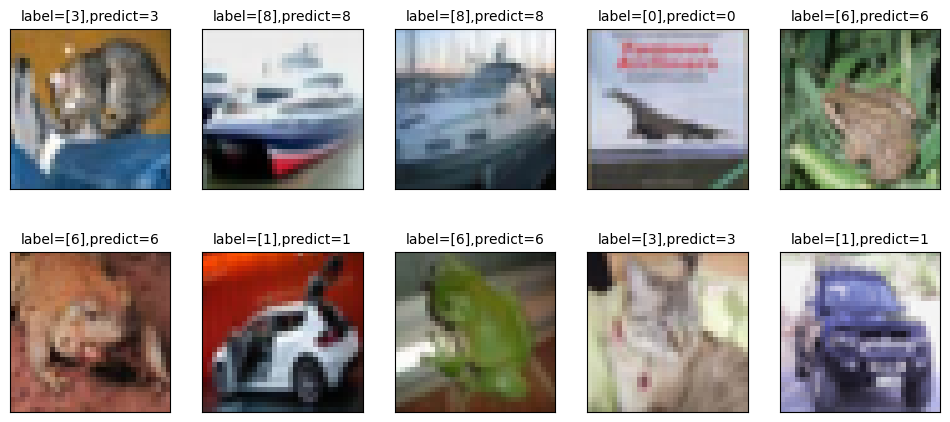

In [19]:
plot_images_labels_prediction(X_test,y_test,prediction,idx=0)